# Single Qubit Operations and Circuits using Qiskit

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# Importing standard Qiskit libraries 
from qiskit import QuantumCircuit, execute
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import *
from qiskit.quantum_info import *

## Statevectors in Qiskit
Qiskit allows us to construct and manipulate statevectors directly. Documentation for the Statevector class can be found [here](https://qiskit.org/documentation/stubs/qiskit.quantum_info.Statevector.html#qiskit.quantum_info.Statevector). We can construct statevectors from the basis states using the `from_label()` method of the Statevector class. Available options include $|0\rangle, |1\rangle, |+\rangle, |-\rangle, |i\rangle, |-i\rangle$. the "label" for these states are `0`,`1`,`+`,`-`,`r` and `l` respectively.

In [2]:
q1_sv = Statevector.from_label('+') # Available basis states are 0, 1, +, -, l, r
print(q1_sv.data)

[0.70710678+0.j 0.70710678+0.j]


The statevector for a single qubit contains two complex numbers. This is accessible via the `data` property as shown above. Statevectors are always represented in the computational basis in qiskit. It is also important for the statevector to be normalised. The `is_valid()` method of a statevector can help us check for this. 

In [3]:
q1_sv.is_valid()

True

We can also find the probability of each outcome for a computational basis measurement. This is accessible via the `probabilities_dict()` method. This returns a dictionary of key-value pairs of outcomes and the associated probabilities. The `probabilities()` method returns a list of probabilities. The sum should be 1. The values printed below are equal to 1 up to numerical error precision. 

In [4]:
print(q1_sv.probabilities_dict())
print(sum(q1_sv.probabilities()))

{'0': 0.4999999999999999, '1': 0.4999999999999999}
0.9999999999999998


Measurement outcomes are probabilistic and measuring a qubit causes the statevector ro _collapse_ to one of the basis states. Only computational basis states are directly acessible within qiskit. We can simulate measurement of a statevector in the computational basis using the `measure()` method. The measurement outcome and the resultant collapsed statevector are returned. We can re-run the cell below multiple times to see that measurement is probabilistic.

In [5]:
outcome, new_sv = q1_sv.measure() # This returns two values
print(f'The outcome of measurement was {outcome}')
print(f'The collapsed statevector after measurement is {new_sv.data}')

The outcome of measurement was 1
The collapsed statevector after measurement is [0.+0.j 1.+0.j]


The idea of measurement collapse is that, after collapse, all subsequent measurements will have the same result. We can see this if we measure the `new_sv` statevector below. We can re-run the cell below multiple times, but the outcome will always be the same. 

In [6]:
outcome2, new2_sv = new_sv.measure() # This returns two values
print('Measured collapsed statevector')
print(f'The outcome of measurement was {outcome2}')
print(f'The collapsed statevector after measurement is {new2_sv.data}')

Measured collapsed statevector
The outcome of measurement was 1
The collapsed statevector after measurement is [0.+0.j 1.+0.j]


Since measurement is probabilistic, the only information we can get from measurement is statistical. So we have to prepare the state and measure it repeatedly. We do this 1000 times below and list of the number of times we get each outcome.

In [7]:
q1_sv = Statevector.from_label('+')
measured_values = [int(q1_sv.measure()[0]) for _ in range(1000)]
print(f'Number of 0 measured: {measured_values.count(0)}, Number of 1 measured: {measured_values.count(1)}')

Number of 0 measured: 492, Number of 1 measured: 508


### Bloch Sphere Visualisation of Statevectors
The Bloch Sphere is a very intuitive representation for visualising single-qubit states and operations. We will be using this to connect the idea of statevectors and operations of them to the circuit model of quantum computation. 
A single-qubit state is represented by a vector _on_ the Bloch sphere, since the Bloch sphere has unit radius and statevectors have unit norm. A general qubit state in Bloch sphere representation is 

$$ |\psi\rangle = \cos{(\tfrac{\theta}{2})}|0\rangle + e^{i\phi}\sin{\tfrac{\theta}{2}}|1\rangle $$

<p style="font-size: 0.9rem;font-style: italic;"><center><div style="display: block"><img style="display: inline; height:250px" src="https://upload.wikimedia.org/wikipedia/commons/9/9d/Six_states_Bloch_sphere.jpg" alt="File:Six states Bloch sphere.jpg"><img style="display: inline; height:250px" src="https://upload.wikimedia.org/wikipedia/commons/6/6b/Bloch_sphere.svg" alt="File:Six states Bloch sphere.jpg"></div></center> 
<br>
Images: <br>
<ul>
    <li>Kevin Garapo, Mhlambululi Mafu, Francesco Petruccione, <a href="https://commons.wikimedia.org/wiki/File:Six_states_Bloch_sphere.jpg">Six states Bloch sphere</a>, <a href="https://creativecommons.org/licenses/by-sa/4.0/legalcode" rel="license">CC BY-SA 4.0</a> <br>
    <li><a href="https://commons.wikimedia.org/wiki/User:Smite-Meister">Smite-Meister</a>, <a href="https://commons.wikimedia.org/wiki/File:Bloch_sphere.svg">Bloch sphere</a>, <a href="https://creativecommons.org/licenses/by-sa/3.0/legalcode" rel="license">CC BY-SA 3.0</a> 
<ul>

Qiskit has tools to help us visualise single-qubit statevectors on the Bloch sphere. This can be done using the `plot_bloch_multivector()` function which is a part of the `qiskit.visualization` module (which we imported in the first cell)

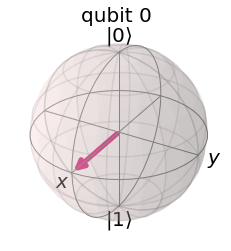

In [8]:
q1_sv = Statevector.from_label('+') # Available basis states are 0, 1, +, -, l, r
plot_bloch_multivector(q1_sv)

## Operators in Qiskit
As with statevectors, qiskit has tools for us to initialise and work with some basic operators. Documentation for the Operator class can be found [here](https://qiskit.org/documentation/stubs/qiskit.quantum_info.Operator.html#qiskit.quantum_info.Operator). Just like statevectors, the `Operator` class has a `from_label()` method that allows us to construct some of the more commonly used operators. The $I$ (Identity operation), $X, Y, Z$ (Pauli operations), $H$ (Hadamard operation) are available. The matrix representation of the operator is available via the `data` property. All quantum operations must be unitary, which means that they should not change the normalisation of the statevectors they act upon. The `is_unitary()` method helps us check for this.

In [9]:
op1 = Operator.from_label('X') # I, X, Y, Z, S, T, H
print(op1.data)
op1.is_unitary()

[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]


True

Since any operation on a quatum computer must be unitary, they are inverted by their _adjoint_ (sometimes also called the Hermitian conjugate or -transpose conjugate). The adjoint is indicated by the dagger symbol $\dagger$.  $$U U^{\dagger} = I \Rightarrow U^{\dagger} = U^{-1}$$ The adjoint of any operator in qiskit is accessible via the `adjoint()` method of the operator. 

In [10]:
op1_adj = op1.adjoint()
print(op1_adj.data)

[[0.-0.j 1.-0.j]
 [1.-0.j 0.-0.j]]


We can directly verify unitarity by multiplying the operator and it's adjoint. This is as simple as merely multiplying the operators together. The resulting operator is the identitiy operator. 

In [11]:
res = op1*op1_adj
print(res.data)

[[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]


### Applying Operators to Statevectors
Now that we can handle statevectors and operators separately, it's time to put them together. An operator changes the statevector of a qubit in a deterministic way. It is important to note that since every single-qubit state corresponds to a vector _on_ the Bloch sphere, and single-qubit operators take one single-qubit state to another. This means that operations will move the statevector around on the Bloch sphere. To see this, let us start in one of the basis states. 

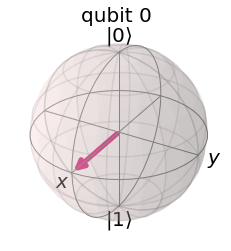

In [12]:
q2_sv_0 = Statevector.from_label('+')
plot_bloch_multivector(q2_sv_0)

Now we can apply the Pauli $Z$ operator to this statevector and see it's action. To do that, we can use the `evolve()` method of the statevector and provide the operator as an argument. This method returns the resultant state after evolution. This corresponds to the following operation
$$ |\psi\rangle \rightarrow Z|\psi\rangle$$
We can alternatively denote this using the following notation
$$ |\psi_{1}\rangle \xrightarrow{Z}|\psi_2\rangle$$

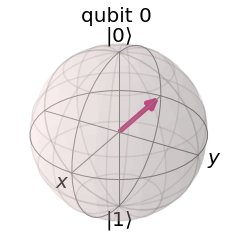

In [13]:
op1 = Operator.from_label('Z')
q2_sv_1 = q2_sv_0.evolve(op1)
plot_bloch_multivector(q2_sv_1)

We see that the vector has moved to the antipodal (diametrically opposite) point. In this case, it might not be clear exactly _how_ the vector has moved. We will see that explicitly later. As we indicated before, the adjoint operation should reverse the action we just performed. 

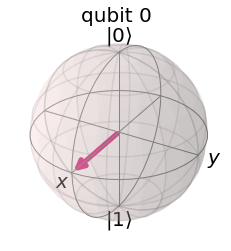

In [14]:
op2 = Operator.from_label('Z')
q2_sv_2 = q2_sv_1.evolve(op2.adjoint())
plot_bloch_multivector(q2_sv_2)

As a sanity check, we can check that the state is the same as the initial state

In [15]:
print(q2_sv_0 == q2_sv_2)

True


### Effect of Single qubit transformations on various basis states
> Using only the Pauli-gates it is impossible to move our initialised qubit to any state other than |0⟩ or |1⟩, i.e. we cannot achieve superposition. This means we can see no behaviour different to that of a classical bit. To create more interesting states we will need more gates! 

(from [Learn Quantum Computation using Qiskit](https://qiskit.org/textbook/preface.html))

The above statement applies to qubits that start in the $|0\rangle$ and $|1\rangle$ states, i.e. in the computational basis. The figure below shows us how we can use various operations to move between the $|0\rangle, |1\rangle, |+\rangle, |-\rangle, |i\rangle, |-i\rangle$. An interesting addition here is $S$ operation and it's adjoint $S^{\dagger}$. $S$ is sometimes called the square root of the Pauli $Z$ operation. We can see why this is so. 

Consider the part of the diagram corresponding to the $|+\rangle, |-\rangle, |i\rangle$ and $|-i\rangle$ states. The action of the $Z$ operation on any of these can be achieved by applying $S$ twice in a row. As an example, we can look at the following two equivalent operations 

$$ |+\rangle \xrightarrow{Z} |-\rangle \Longleftrightarrow |+\rangle \xrightarrow{S} |i\rangle \xrightarrow{S} |-\rangle $$

<center><img style="display:block; width: 700px" src="https://raw.githubusercontent.com/deadbeatfour/intro-qc-2021/main/img/op_bloch.png" alt="Effect of Single qubit transformations on various basis states"></center>

From that particular example, it appears that the $Z$ operation actually rotates the vector about the $z$-axis (line joining $|0\rangle$ and $|1\rangle$) by $180^{\circ}$ or $\pi$ radians. The $S$ gate rotates the vector about the same axis by $90^{\circ}$ or $\pi/2$ radians in the counterclockwise direction. If we consider the form of a general qubit state on the Bloch sphere,

$$ |\psi\rangle = \cos{(\tfrac{\theta}{2})}|0\rangle + e^{i\phi}\sin{\tfrac{\theta}{2}}|1\rangle $$ 

both these operations change the parameter $\phi$, which we call the relative phase. For this reason, the $S$ operation is sometimes also called the 'phase' operation. If we look at the matrix representations of these operations, we can see a pattern. The matrix for $Z$ is 

$$ 
Z = 
\begin{pmatrix}
    1 & 0 \\
    0 & -1 
\end{pmatrix}
$$
The matrix for $S$ is 
$$ 
S = 
\begin{pmatrix}
    1 & 0 \\
    0 & i 
\end{pmatrix}
$$
We can have a generalised phase-shift operation corresponding to rotation by some angle $\phi$ about the $z$-axis. This will have the matrix representation
$$ 
R_{\phi} = 
\begin{pmatrix}
    1 & 0 \\
    0 & e^{i\phi}
\end{pmatrix}
$$
We will see other examples of operations later. 

## Circuit model of Quantum Computing

So far we have discussed applying different operations on a single qubit. In order to program a quantum computer, we need a framework that allows us to codify this information. We need a method of specifying which operations will be applied on a particular qubit in which order. The circuit model of quantum computing aims to solve exactly this problem. A quantum circuit is essentially an ordered list of operations (also called gating operations or _gates_) to a qubit. This is diagramatically represented as a horizontal line or wire representing the qubit. Operations or gates are written on the wire in the order they will be performed. In one of the previous sections we applied the $Z$ operation on the $|+\rangle$ state. We know that we can apply the Hadamard operation $H$ on the $|0\rangle$ state to get $|+\rangle$. So this sequence of operations can be seen as
$$ |0\rangle \xrightarrow{H} |+\rangle \xrightarrow{Z} |-\rangle $$
In qiskit, we can create a `QuantumCircuit()` and then add gates to it. The syntax for adding gates to a circuit is fairly intuitive. The documentation for this is given [here](https://qiskit.org/documentation/apidoc/circuit.html). Let us create the circuit for the aforementioned operation in qiskit and then view it using the `draw()` method. 

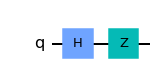

In [16]:
qc = QuantumCircuit(1)
qc.h(0)
qc.z(0)
qc.draw(output='mpl')

We can visualise these operations as an animation on the Bloch sphere using the `visualize_transisition()` function ([documentation](https://qiskit.org/documentation/stubs/qiskit.visualization.visualize_transition.html#qiskit.visualization.visualize_transition)). 

In [ ]:
visualize_transition(qc, trace=True)

### Measurements and running experiments
While all of this helps us visualise what happens inside a quantum computer, we can't really see this while running an actual experiment. This is because any attempt to determine the state of the system (which can only be done by measuring), collapses the statevector and destroys deterministic computation. For this purpose, a measurement is typically added only at the end of a quantum circuit. With that added, the final circuit will be:

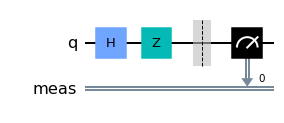

In [18]:
qc = QuantumCircuit(1)
qc.h(0)
qc.z(0)
qc.measure_all()
qc.draw(output='mpl')

We're now ready to run our first quantum experiment. For now, we will be using a simulator. Qiskit provides a high-performance simulator backend called `QasmSimulator()`. The result of the experiment will the the measured outcome of the qubit. To get any information regarding the state of the qubit (which is only accessible to us in terms of outcome probabilities), we need to run the circuit multiple times. We can do that using the `execute()` function. We then visualise the results in the form of a histogram.

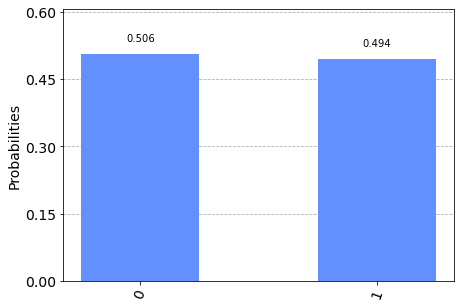

In [19]:
job = execute(qc, backend=QasmSimulator(), shots=1024)
plot_histogram(job.result().get_counts())

The results of the experiment are accessible as a dictionary of counts

In [20]:
job.result().get_counts()

{'0': 518, '1': 506}